<a href="https://colab.research.google.com/github/khojun611/6team/blob/main/%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98_screw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import cv2
from google.colab.patches import cv2_imshow

In [ ]:
data_dir = "/content/drive/MyDrive/data_train_state/screw"
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

381


In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 381 files belonging to 6 classes.
Using 305 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 381 files belonging to 6 classes.
Using 76 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['good', 'manipulated_front', 'scratch_head', 'scratch_neck', 'thread_side', 'thread_top']


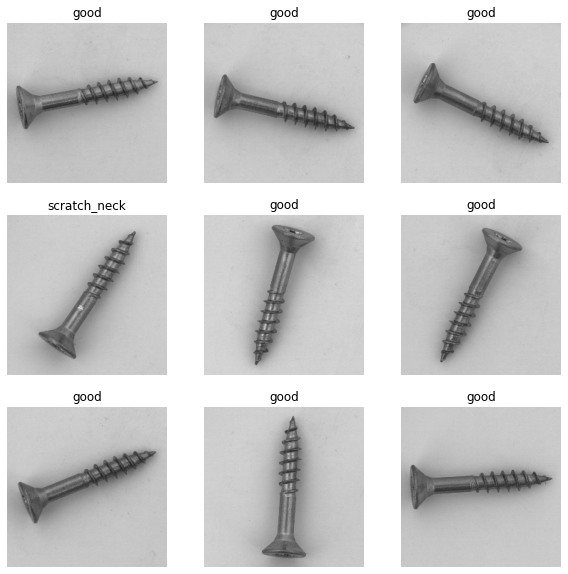

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
base_model = tf.keras.applications.efficientnet.EfficientNetB7(
    include_top=False, pooling = 'avg' , input_shape = (224,224 ,3),
    weights = 'imagenet')

base_model.trainable = False

# 모델 layer 설계
inputs = tf.keras.Input(shape=(224,224,3))
x = base_model(inputs, training=False)

outputs = Dense(15, activation = 'softmax')(x)
model_res = tf.keras.Model(inputs, outputs)

In [ ]:
model_res.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 2560)             64097687  
                                                                 
 dense_2 (Dense)             (None, 15)                38415     
                                                                 
Total params: 64,136,102
Trainable params: 38,415
Non-trainable params: 64,097,687
_________________________________________________________________


In [ ]:
model_res.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model_res.fit(train_ds,validation_data=val_ds, epochs=20, callbacks=[early])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 27s 861ms/step - loss: 1.3750 - accuracy: 0.7738 - val_loss: 0.7758 - val_accuracy: 0.8421
Epoch 2/20
10/10 [==============================] - 7s 406ms/step - loss: 0.8062 - accuracy: 0.8393 - val_loss: 0.8137 - val_accuracy: 0.8421
Epoch 3/20
10/10 [==============================] - 7s 408ms/step - loss: 0.7498 - accuracy: 0.8393 - val_loss: 0.7141 - val_accuracy: 0.8421
Epoch 4/20
10/10 [==============================] - 7s 409ms/step - loss: 0.6773 - accuracy: 0.8393 - val_loss: 0.7073 - val_accuracy: 0.8421
Epoch 5/20
10/10 [==============================] - 7s 408ms/step - loss: 0.6740 - accuracy: 0.8393 - val_loss: 0.6721 - val_accuracy: 0.8421
Epoch 6/20
10/10 [==============================] - 7s 407ms/step - loss: 0.6568 - accuracy: 0.8393 - val_loss: 0.6813 - val_accuracy: 0.8421
Epoch 7/20
10/10 [==============================] - 7s 406ms/step - loss: 0.6491 - accuracy: 0.8393 - val_loss: 0.6792 - val_accuracy: 0.8421
Epoch 8/20
10/10

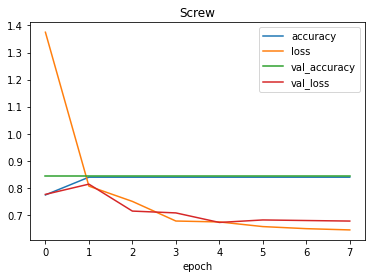

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Screw')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()